<a href="https://colab.research.google.com/github/leighd2008/TF-class-colab-notebooks/blob/main/01_Neural_network_regression_with_TensorFlow_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🛠 01. Neural network regression with TensorFlow Exercises


1.   Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.
2.   Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?
3. Try and improve the results we got on the insurance dataset, some things you might want to try include:
  * Building a larger model (how does one with 4 
dense layers go?).
  * Increasing the number of units in each layer.
  * Lookup the documentation of Adam and find out what the first parameter is, what happens if you increase it by 10x?
  * What happens if you train for longer (say 300 epochs instead of 200)?
4. Import the Boston pricing dataset from TensorFlow tf.keras.datasets and model it.

In [ ]:
import tensorflow as tf 
import tensorflow_datasets as tfds

### 1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression 

X , y  = make_regression(n_samples = 200 , 
                               n_features = 10 , 
                               n_targets = 1)

X.shape , y.shape

((200, 10), (200,))

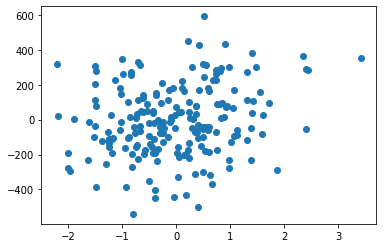

In [ ]:
# Let's visualize the dataset 

plt.scatter(X[:, 0] , y)

In [ ]:
# Modelling our dummy data 

# Set the random seed 
tf.random.set_seed(42)

# Create a model using the Sequential API 
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model 
model.compile(loss = tf.keras.losses.mae , 
              optimizer = tf.keras.optimizers.Adam() , 
              metrics = ['mae'])

# Fitting the model 
model.fit(X , y , epochs = 10)

Epoch 1/10
7/7 [==============================] - 1s 4ms/step - loss: 161.8678 - mae: 161.8678
Epoch 2/10
7/7 [==============================] - 0s 4ms/step - loss: 161.8541 - mae: 161.8541
Epoch 3/10
7/7 [==============================] - 0s 5ms/step - loss: 161.8409 - mae: 161.8409
Epoch 4/10
7/7 [==============================] - 0s 3ms/step - loss: 161.8278 - mae: 161.8278
Epoch 5/10
7/7 [==============================] - 0s 3ms/step - loss: 161.8148 - mae: 161.8148
Epoch 6/10
7/7 [==============================] - 0s 3ms/step - loss: 161.8017 - mae: 161.8017
Epoch 7/10
7/7 [==============================] - 0s 2ms/step - loss: 161.7896 - mae: 161.7896
Epoch 8/10
7/7 [==============================] - 0s 2ms/step - loss: 161.7766 - mae: 161.7766
Epoch 9/10
7/7 [==============================] - 0s 2ms/step - loss: 161.7643 - mae: 161.7643
Epoch 10/10
7/7 [==============================] - 0s 2ms/step - loss: 161.7520 - mae: 161.7520


### 2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?

In [ ]:
# Building the model again with 4 Dense layers 
tf.random.set_seed(42)

# Build the model 
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10) , 
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
]) 

# Compile the model
model.compile(loss = tf.keras.losses.mae , 
              optimizer = tf.keras.optimizers.Adam() , 
              metrics = ['mae'])

# Fit the model 
model.fit(X , y , epochs= 10)

Epoch 1/10
7/7 [==============================] - 1s 3ms/step - loss: 161.7120 - mae: 161.7120
Epoch 2/10
7/7 [==============================] - 0s 4ms/step - loss: 161.6484 - mae: 161.6484
Epoch 3/10
7/7 [==============================] - 0s 3ms/step - loss: 161.5893 - mae: 161.5893
Epoch 4/10
7/7 [==============================] - 0s 3ms/step - loss: 161.5203 - mae: 161.5203
Epoch 5/10
7/7 [==============================] - 0s 3ms/step - loss: 161.4419 - mae: 161.4419
Epoch 6/10
7/7 [==============================] - 0s 3ms/step - loss: 161.3565 - mae: 161.3565
Epoch 7/10
7/7 [==============================] - 0s 4ms/step - loss: 161.2509 - mae: 161.2509
Epoch 8/10
7/7 [==============================] - 0s 7ms/step - loss: 161.1252 - mae: 161.1252
Epoch 9/10
7/7 [==============================] - 0s 4ms/step - loss: 160.9780 - mae: 160.9780
Epoch 10/10
7/7 [==============================] - 0s 5ms/step - loss: 160.7964 - mae: 160.7964


Hmm..Seems the model isn't improving maybe running for more epochs would do the magic. But let's split this into train and test set to help our model to generalize well.



In [ ]:
# Splitting the data into train and test splits 
from sklearn.model_selection import train_test_split 

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 )

# Checking the shapes of our splitted data 
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((160, 10), (160,), (40, 10), (40,))

In [ ]:
# Let's build the model from scratch
# set random seed
tf.random.set_seed(42)

# model 1 with one layer and fewer units
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile model
model_1.compile(loss = tf.keras.losses.mae,
                  optimizer = tf.keras.optimizers.Adam(),
                  metrics = ["mae"])

# 3. Fit the model on the training data
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 6ms/step - loss: 164.3761 - mae: 164.3761
Epoch 2/100
5/5 [==============================] - 0s 7ms/step - loss: 164.2009 - mae: 164.2009
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 164.0038 - mae: 164.0038
Epoch 4/100
5/5 [==============================] - 0s 7ms/step - loss: 163.7589 - mae: 163.7589
Epoch 5/100
5/5 [==============================] - 0s 6ms/step - loss: 163.4911 - mae: 163.4911
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 163.1541 - mae: 163.1541
Epoch 7/100
5/5 [==============================] - 0s 11ms/step - loss: 162.7773 - mae: 162.7773
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 162.3659 - mae: 162.3659
Epoch 9/100
5/5 [==============================] - 0s 12ms/step - loss: 161.8559 - mae: 161.8559
Epoch 10/100
5/5 [==============================] - 0s 8ms/step - loss: 161.2397 - mae: 161.2397
Epoch 11/100
5/5 [===================

In [ ]:
# Evaluating our model on the test data (unseen data) not fitted
model_1.evaluate(X_test , y_test)

2/2 [==============================] - 0s 10ms/step - loss: 147.1806 - mae: 147.1806


[147.18057250976562, 147.18057250976562]

In [ ]:
# Let's build the model from scratch
# set random seed
tf.random.set_seed(42)

# model 1 with one layer and fewer units
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile model
model_1.compile(loss = tf.keras.losses.mae,
                  optimizer = tf.keras.optimizers.Adam(),
                  metrics = ["mae"])

# 3. Fit the model on the training data
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 165.5429 - mae: 165.5429
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 165.5332 - mae: 165.5332
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 165.5234 - mae: 165.5234
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 165.5132 - mae: 165.5132
Epoch 5/100
5/5 [==============================] - 0s 6ms/step - loss: 165.5033 - mae: 165.5033
Epoch 6/100
5/5 [==============================] - 0s 9ms/step - loss: 165.4933 - mae: 165.4933
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 165.4833 - mae: 165.4833
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 165.4738 - mae: 165.4738
Epoch 9/100
5/5 [==============================] - 0s 7ms/step - loss: 165.4635 - mae: 165.4635
Epoch 10/100
5/5 [==============================] - 0s 6ms/step - loss: 165.4533 - mae: 165.4533
Epoch 11/100
5/5 [=====================

In [ ]:
# Evaluating our model on the test data (unseen data) fitted
model_1.evaluate(X_test , y_test)

2/2 [==============================] - 0s 7ms/step - loss: 146.3645 - mae: 146.3645


[146.36453247070312, 146.36453247070312]

In [ ]:
# Evaluating our model on the test data (unseen data) fitted
model.evaluate(X_test , y_test)

2/2 [==============================] - 0s 9ms/step - loss: 0.1110 - mae: 0.1110


[0.11103943735361099, 0.11103943735361099]

In [ ]:
# Getting the predictions of our model 
y_preds_1 = model_1.predict(X_test)
y_preds_1

array([[ 0.68478185],
       [ 0.4498601 ],
       [ 1.9410329 ],
       [ 1.9008217 ],
       [ 1.5093746 ],
       [-0.42704225],
       [-1.4121625 ],
       [-2.9181898 ],
       [-0.1939748 ],
       [-0.8921219 ],
       [-0.17730036],
       [ 2.6602387 ],
       [ 0.91879743],
       [-2.65309   ],
       [-1.8313162 ],
       [ 0.12209186],
       [-0.3457018 ],
       [ 0.8806314 ],
       [ 0.7883804 ],
       [-0.03075962],
       [ 1.2515993 ],
       [-1.2874112 ],
       [-0.25972182],
       [-0.6025818 ],
       [-1.5126381 ],
       [-1.298207  ],
       [ 1.4521232 ],
       [-0.5786941 ],
       [ 2.736072  ],
       [ 1.645586  ],
       [-0.8858094 ],
       [ 0.08122393],
       [-0.7620244 ],
       [-0.58262503],
       [-0.30344206],
       [-1.0169272 ],
       [ 0.47856688],
       [-2.083401  ],
       [ 0.8898825 ],
       [-1.9144173 ]], dtype=float32)

In [ ]:
from IPython.core.pylabtools import figsize
def plot_predictions(train_data,
                     train_labels,
                     test_data,
                     test_labels,
                     predictions):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,7))
  # Plot traingin data in blue
  plt.scatter(train_data, train_labels, c='b', label='Training Data')
  # Plot test data in green
  plt.scatter(test_data, test_labels, c='g', label='Testing Data')
  # Plot predictions in red (made on test data)
  plt.scatter(test_data, predictions, c='r', label='Predictions')
  # Show the legend
  plt.legend();

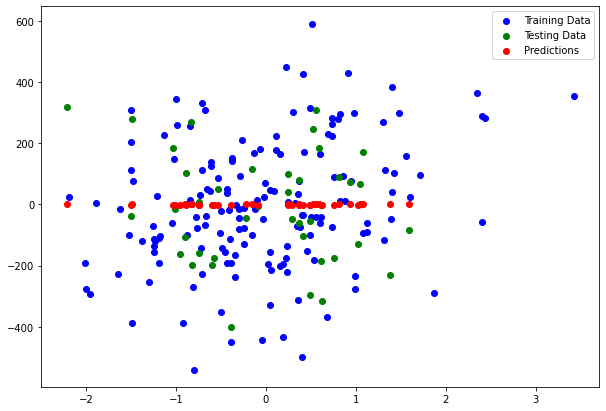

In [ ]:
# Plotting predictions 
plot_predictions(X_train[:,0], y_train,
                 X_test[:,0], y_test, y_preds_1)

Great! Our model is trying to predict the points but it's not doing a great job with it.

Let's try couple of experiments and see how it goes.

In [ ]:
# Building a model with 2 layers and fewer units
tf.random.set_seed(42)

# Build the model 
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10) ,
  tf.keras.layers.Dense(10), 
])

# Compile the model 
model_2.compile(loss = tf.keras.losses.mae , 
                optimizer = tf.keras.optimizers.Adam() , 
                metrics = ['mae'])

# Fit the model 
model_2.fit(X_train , y_train , epochs = 100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 165.4528 - mae: 165.4528
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 165.4394 - mae: 165.4394
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 165.4263 - mae: 165.4263
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 165.4123 - mae: 165.4123
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 165.3987 - mae: 165.3987
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 165.3837 - mae: 165.3837
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 165.3689 - mae: 165.3689
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 165.3539 - mae: 165.3539
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 165.3375 - mae: 165.3375
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 165.3198 - mae: 165.3198
Epoch 11/100
5/5 [=====================

In [ ]:
# Building our model with 3 layers and with more hidden units 

tf.random.set_seed(42)

# Creating the model 
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), 
  tf.keras.layers.Dense(50), 
  tf.keras.layers.Dense(1) # Should be always one 
])

# Compile the model 
model_3.compile(loss = tf.keras.losses.mae , 
                optimizer = tf.keras.optimizers.Adam() , 
                metrics = ['mae'])

# Fit the model 
model_3.fit(X_train , y_train , epochs = 100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 165.0431 - mae: 165.0431
Epoch 2/100
5/5 [==============================] - 0s 6ms/step - loss: 164.5122 - mae: 164.5122
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 163.9481 - mae: 163.9481
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 163.3182 - mae: 163.3182
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 162.6006 - mae: 162.6006
Epoch 6/100
5/5 [==============================] - 0s 6ms/step - loss: 161.7481 - mae: 161.7481
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 160.7507 - mae: 160.7507
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 159.5956 - mae: 159.5956
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 158.1349 - mae: 158.1349
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 156.4205 - mae: 156.4205
Epoch 11/100
5/5 [=====================

In [ ]:
model_3.evaluate(X_test , y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.3860 - mae: 0.3860


[0.38597607612609863, 0.38597607612609863]

In [ ]:
# Making predictions 
y_preds_3 = model_3.predict(X_test)
y_preds_3.shape

(40, 1)

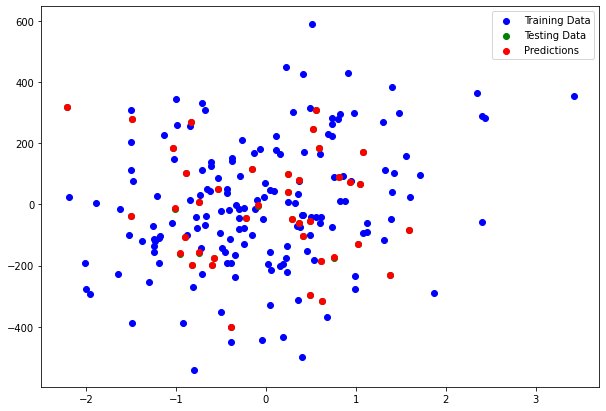

In [ ]:
plot_predictions(X_train[: , 0] , y_train , 
                 X_test[: , 0] , y_test , 
                 y_preds_3)

Look at that! Our model has predicted every test data correctly. You can't spot a green dot (test data) it's because our predictions (red dot) overlapped.

Our model is doing a perfect job!

## Try and improve the results we got on the insurance dataset, some things you might want to try include:

* Building a larger model (how does one with 4 dense layers go?).
* Increasing the number of units in each layer.
* Lookup the documentation of Adam and find out what the first parameter is,what happens if you increase it by 10x?
* What happens if you train for longer (say 300 epochs instead of 200)?

### Building a larger model (how does one with 4 dense layers go?)


In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Read in the insurance dataset from kaggle
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.shape


(1338, 7)

In [ ]:
insurance.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Prepare the data using classes from Scikit-learn
convert categorical data into numbers using pandas

In [ ]:
# Turn categorical data into numbers
insurance_OHE = pd.get_dummies(insurance)
insurance_OHE.head()


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create X & y

X = insurance_OHE.drop("charges", axis=1)
y = insurance_OHE["charges"]

X.shape, y.shape


((1338, 11), (1338,))

In [ ]:
# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1070, 11), (268, 11), (1070,), (268,))

In [ ]:
# Build the model with 4 dense layers and more units

tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(300),
  tf.keras.layers.Dense(200),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(50),
  tf.keras.layers.Dense(1)
])

# Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# Fit the model
model.fit(X_train, y_train, epochs=100)


Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 10725.5371 - mae: 10725.5371
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7422.3755 - mae: 7422.3755
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7066.0674 - mae: 7066.0674
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 6787.9707 - mae: 6787.9707
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 6686.8662 - mae: 6686.8662
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 6569.1284 - mae: 6569.1284
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 6504.2656 - mae: 6504.2656
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 6468.7095 - mae: 6468.7095
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 6328.6621 - mae: 6328.6621
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 6208.7832 - mae: 6208.78

In [ ]:
# Tweak the Adam optimizer's learning rate (10x from 0.001-default to 0.01) and increace epochs
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(300),
  tf.keras.layers.Dense(200),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(50),
  tf.keras.layers.Dense(1)
])

# Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# Fit the model
history = model.fit(X_train, y_train, epochs=400)


Epoch 1/400


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


34/34 [==============================] - 1s 3ms/step - loss: 7778.9912 - mae: 7778.9912
Epoch 2/400
34/34 [==============================] - 0s 3ms/step - loss: 6262.1514 - mae: 6262.1514
Epoch 3/400
34/34 [==============================] - 0s 3ms/step - loss: 5589.3882 - mae: 5589.3882
Epoch 4/400
34/34 [==============================] - 0s 3ms/step - loss: 4189.1177 - mae: 4189.1177
Epoch 5/400
34/34 [==============================] - 0s 3ms/step - loss: 4142.7666 - mae: 4142.7666
Epoch 6/400
34/34 [==============================] - 0s 3ms/step - loss: 4186.5771 - mae: 4186.5771
Epoch 7/400
34/34 [==============================] - 0s 3ms/step - loss: 4046.2336 - mae: 4046.2336
Epoch 8/400
34/34 [==============================] - 0s 3ms/step - loss: 4129.2734 - mae: 4129.2734
Epoch 9/400
34/34 [==============================] - 0s 3ms/step - loss: 3979.9023 - mae: 3979.9023
Epoch 10/400
34/34 [==============================] - 0s 3ms/step - loss: 3883.2227 - mae: 3883.2227
Epoch 11/40

In [ ]:
# Evaluate on test data
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3229.7437 - mae: 3229.7437


[3229.74365234375, 3229.74365234375]

Text(0.5, 0, 'Epochs')

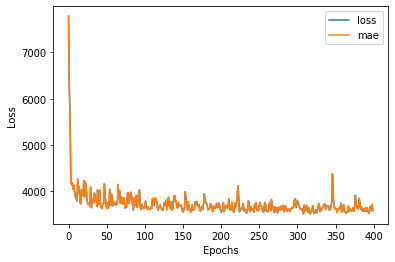

In [ ]:
# Plot loss curve Vs Epochs
import pandas as pd
pd.DataFrame(history.history).plot()
plt.ylabel('Loss')
plt.xlabel('Epochs')

### Import the Boston pricing dataset from TensorFlow tf.keras.datasets and model it

In [ ]:
# Getting the boston datasets from tensorflow datasets
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path = 'boston_housing_npz', test_split=0.2, seed=42)

65536/57026 [==================================] - 0s 0us/step


This dataset is numpy array format and it's normalized

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [ ]:
# Build a model
tf.random.set_seed(42)

# Create model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(200),
  tf.keras.layers.Dense(200),
  tf.keras.layers.Dense(150),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae'])

# Fit the model
history = model.fit(X_train, y_train, epochs=300)

Epoch 1/300
13/13 [==============================] - 1s 3ms/step - loss: 95.6416 - mae: 95.6416
Epoch 2/300
13/13 [==============================] - 0s 3ms/step - loss: 15.5989 - mae: 15.5989
Epoch 3/300
13/13 [==============================] - 0s 3ms/step - loss: 8.6769 - mae: 8.6769
Epoch 4/300
13/13 [==============================] - 0s 3ms/step - loss: 7.5622 - mae: 7.5622
Epoch 5/300
13/13 [==============================] - 0s 3ms/step - loss: 7.1922 - mae: 7.1922
Epoch 6/300
13/13 [==============================] - 0s 3ms/step - loss: 6.3219 - mae: 6.3219
Epoch 7/300
13/13 [==============================] - 0s 3ms/step - loss: 6.7137 - mae: 6.7137
Epoch 8/300
13/13 [==============================] - 0s 3ms/step - loss: 6.3261 - mae: 6.3261
Epoch 9/300
13/13 [==============================] - 0s 3ms/step - loss: 7.6760 - mae: 7.6760
Epoch 10/300
13/13 [==============================] - 0s 3ms/step - loss: 8.2790 - mae: 8.2790
Epoch 11/300
13/13 [==============================] - 0

In [ ]:
# Evaluate on the test data
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 6ms/step - loss: 3.7630 - mae: 3.7630


[3.76304030418396, 3.76304030418396]

Text(0.5, 0, 'epochs')

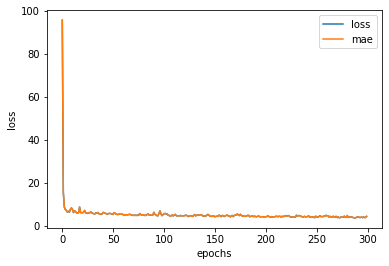

In [ ]:
# Plotting the loss Vs Epochs
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')